# Qiskit Basics

In [1]:
import qiskit

In [9]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [10]:
from qiskit import IBMQ

In [11]:
IBMQ.save_account('#####')

/home/rahul/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [14]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Hellow world in Qiskit

In [15]:
from qiskit import *

In [16]:
qr = QuantumRegister(2)

In [17]:
cr = ClassicalRegister(2)

In [18]:
circuit=QuantumCircuit(qr,cr)

In [21]:
%matplotlib inline

In [22]:
circuit.draw()

In [25]:
circuit.h(qr[0])

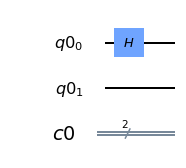

In [27]:
circuit.draw(output='mpl')

In [29]:
circuit.cx(qr[0],qr[1])

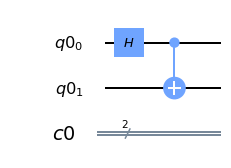

In [30]:
circuit.draw(output='mpl')

In [31]:
 circuit.measure(qr,cr)

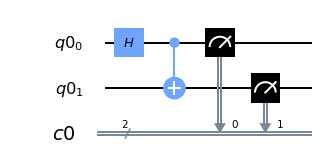

In [32]:
circuit.draw(output='mpl')

In [33]:
simulator= Aer.get_backend('qasm_simulator')

In [35]:
result=execute(circuit,backend=simulator).result()

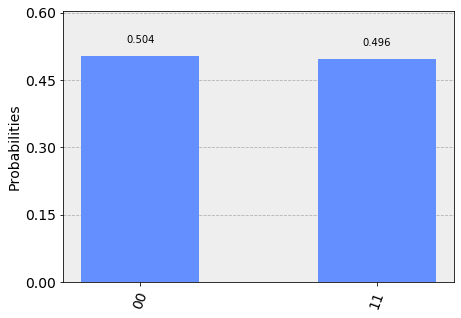

In [37]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [40]:
IBMQ.load_account()

/home/rahul/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [41]:
provider = IBMQ.get_provider('ibm-q')

In [43]:
qcomp=provider.get_backend('ibmq_16_melbourne')

In [44]:
job=execute(circuit,backend=qcomp)

In [47]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [48]:
result=job.result()

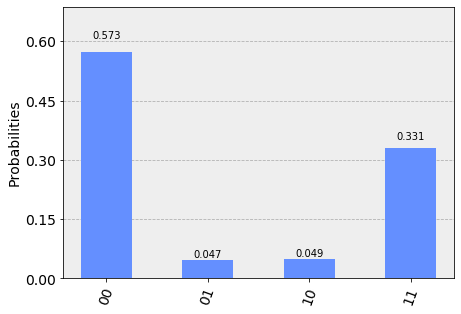

In [50]:
plot_histogram(result.get_counts(circuit))

# Quantum gates working methods

In [51]:
from qiskit.tools.visualization import plot_bloch_multivector

In [52]:
circuit=QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend('statevector_simulator')
result=execute(circuit,backend=simulator).result()
statevector=result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


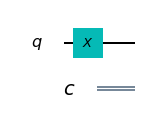

In [55]:
circuit.draw(output='mpl')

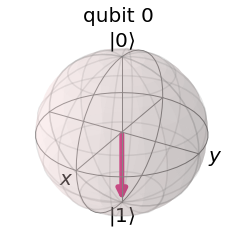

In [56]:
plot_bloch_multivector(statevector)

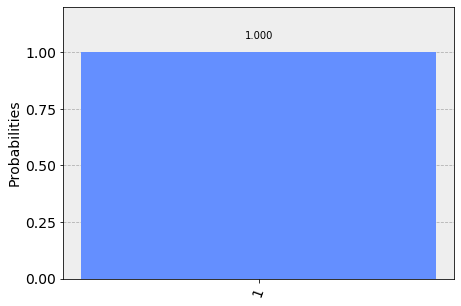

In [57]:
circuit.measure([0],[0])
backend=Aer.get_backend('qasm_simulator')
plot_histogram(execute(circuit,backend=backend,shots=1024).result().get_counts())

In [59]:
circuit=QuantumCircuit(1,1)
circuit.x(0)
simulator=Aer.get_backend('unitary_simulator')
result=execute(circuit,backend=simulator).result()
unitary=result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


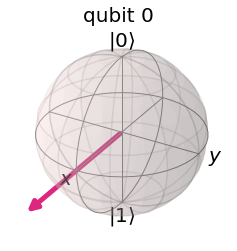

In [60]:
plot_bloch_multivector(unitary)

# Teleportation

In [70]:
circuit=QuantumCircuit(3,3)

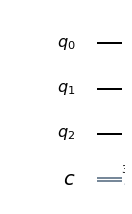

In [71]:
circuit.draw(output='mpl')

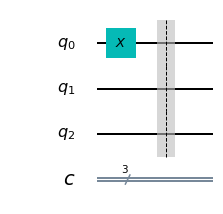

In [72]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

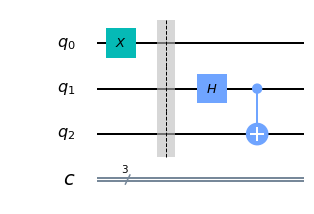

In [73]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

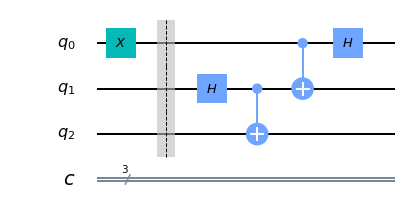

In [74]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

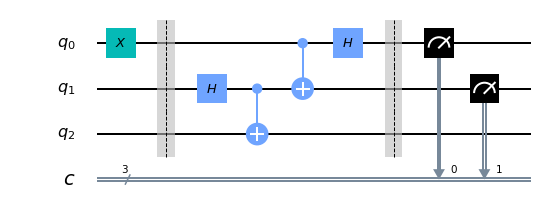

In [75]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

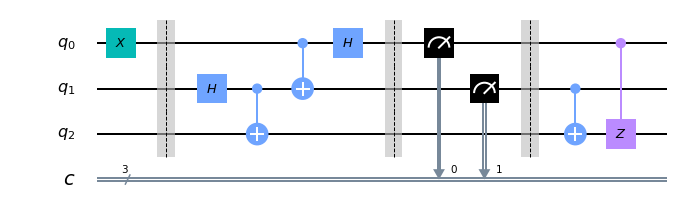

In [76]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

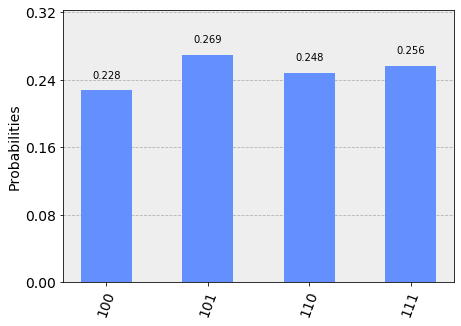

In [78]:
circuit.measure(2,2)
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

In [79]:
print(counts)

{'100': 233, '101': 275, '111': 262, '110': 254}


# Bernstein-Vazirani Algorithm

In [80]:
secret_number='101001'

In [92]:
circuit=QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

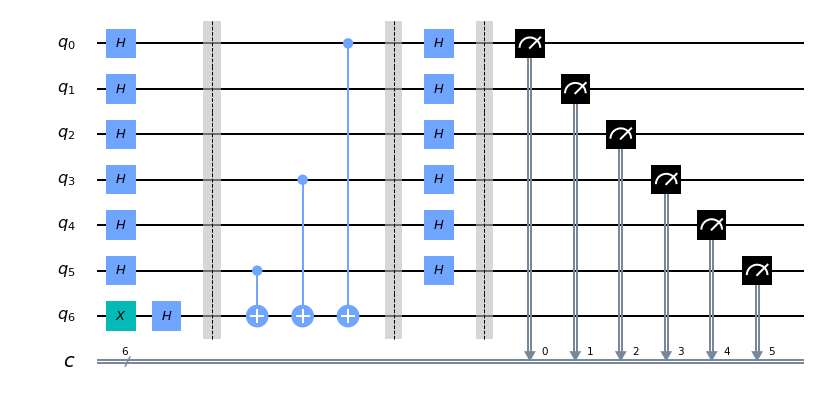

In [93]:
circuit.draw(output='mpl')

In [94]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'101001': 1}


# Generalised Bernstein-Vazirani Algorithm : 

In [106]:
secret_number='111111111'

In [107]:
circuit=QuantumCircuit(len(secret_number)+1,len(secret_number))
circuit.h(range(len(secret_number)))
circuit.x(len(secret_number))
circuit.h(len(secret_number))
circuit.barrier()
for ii, yesno in enumerate(reversed(secret_number)):
    if yesno=='1':
        circuit.cx(ii,len(secret_number))


circuit.barrier()
circuit.h(range(len(secret_number)))
circuit.barrier()
circuit.measure(range(len(secret_number)),range(len(secret_number)))

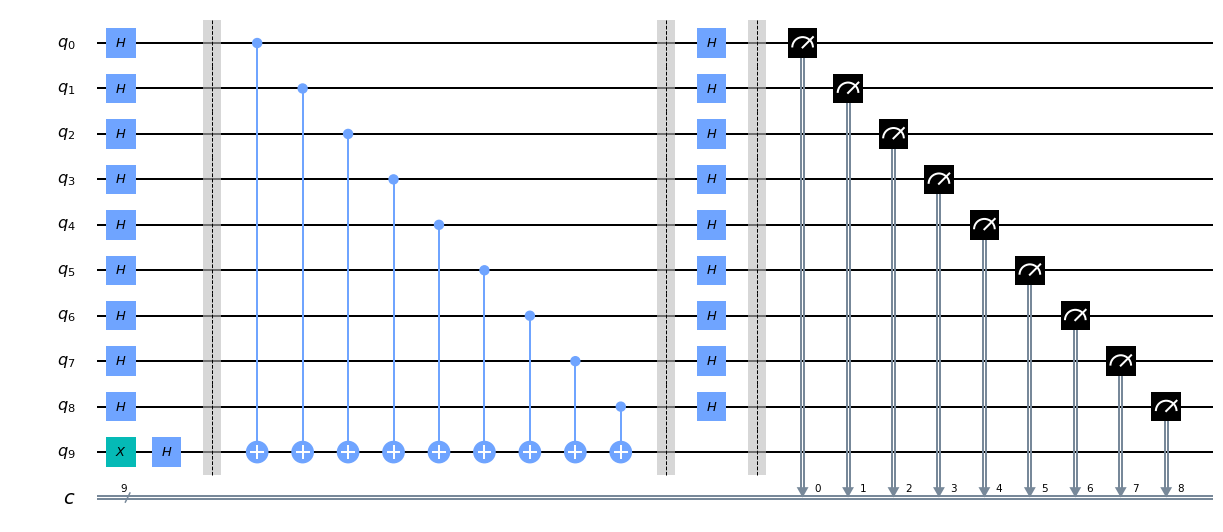

In [108]:
circuit.draw(output='mpl')

In [109]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator,shots=1).result()
counts=result.get_counts()
print(counts)

{'111111111': 1}
